In [1]:
# K-Modes
from kmodes.kmodes import KModes

# DBSCAN
from sklearn.cluster import DBSCAN

# Hierarchical Clustering (Aglomerativo)
from sklearn.cluster import AgglomerativeClustering

# Para visualização
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
fatores_df = pd.read_csv(r'C:\Users\maype\Desktop\projetos\Trabalho Prático AM2\data\base_fatores.csv')

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 465439.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 465439.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 465439.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 465439.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 465439.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 465439.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 465439.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, ite

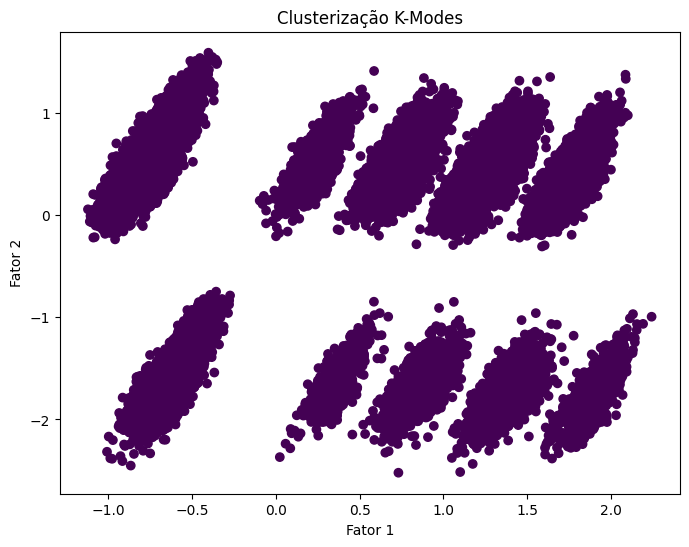

In [3]:
# K-Modes
k_modes = KModes(n_clusters=3, init='Huang', n_init=10, verbose=1)
clusters_kmodes = k_modes.fit_predict(fatores_df.drop('diagnostico_hipertensao', axis=1))

# Adicionando os resultados ao DataFrame
fatores_df['cluster_kmodes'] = clusters_kmodes

# Visualizando o resultado
plt.figure(figsize=(8, 6))
plt.scatter(fatores_df['Fator_1'], fatores_df['Fator_2'], c=clusters_kmodes, cmap='viridis')
plt.title('Clusterização K-Modes')
plt.xlabel('Fator 1')
plt.ylabel('Fator 2')
plt.show()


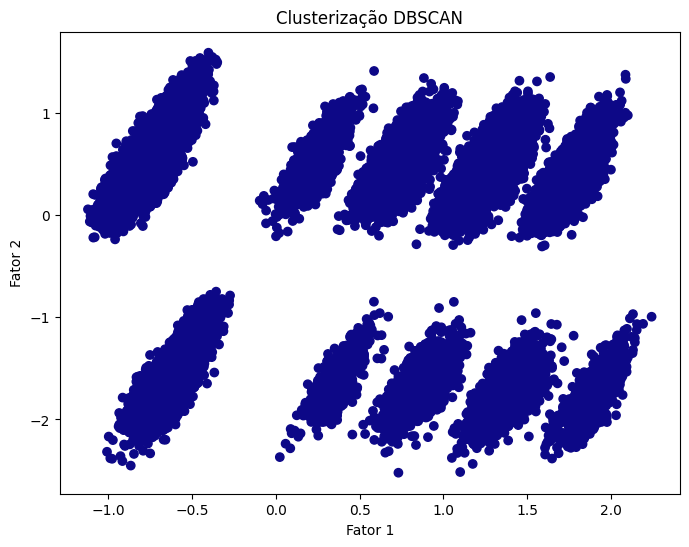

In [4]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajuste eps e min_samples conforme necessário
clusters_dbscan = dbscan.fit_predict(fatores_df.drop('diagnostico_hipertensao', axis=1))

# Adicionando os resultados ao DataFrame
fatores_df['cluster_dbscan'] = clusters_dbscan

# Visualizando o resultado
plt.figure(figsize=(8, 6))
plt.scatter(fatores_df['Fator_1'], fatores_df['Fator_2'], c=clusters_dbscan, cmap='plasma')
plt.title('Clusterização DBSCAN')
plt.xlabel('Fator 1')
plt.ylabel('Fator 2')
plt.show()


In [ ]:
# Hierarchical Clustering (Aglomerativo)
agg_clust = AgglomerativeClustering(n_clusters=3)  # Ajuste n_clusters conforme necessário
clusters_agg = agg_clust.fit_predict(fatores_df.drop('diagnostico_hipertensao', axis=1))

# Adicionando os resultados ao DataFrame
fatores_df['cluster_agg'] = clusters_agg

# Visualizando o resultado
plt.figure(figsize=(8, 6))
plt.scatter(fatores_df['Fator_1'], fatores_df['Fator_2'], c=clusters_agg, cmap='coolwarm')
plt.title('Clusterização Hierarchical Clustering (Aglomerativo)')
plt.xlabel('Fator 1')
plt.ylabel('Fator 2')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Avaliando a silhueta de cada modelo
sil_kmodes = silhouette_score(fatores_df.drop('diagnostico_hipertensao', axis=1), clusters_kmodes)
sil_dbscan = silhouette_score(fatores_df.drop('diagnostico_hipertensao', axis=1), clusters_dbscan)
sil_agg = silhouette_score(fatores_df.drop('diagnostico_hipertensao', axis=1), clusters_agg)

print(f'Silhueta K-Modes: {sil_kmodes}')
print(f'Silhueta DBSCAN: {sil_dbscan}')
print(f'Silhueta Aglomerativo: {sil_agg}')
